Notebook to make modified boundary conditions files to smoothly take us from climatology to Live Ocean.  Creates two modified files: a constant TEOS 10 climatology for Feb 4, 2017 and a blend to LO for Feb 5, 2017.

In [24]:
import datetime
import matplotlib.pyplot as plt
import netCDF4 as nc

%matplotlib inline

In [26]:
climatology_file = '/results/nowcast-sys/NEMO-forcing/open_boundaries/west/SalishSea_west_TEOS10.nc'
climate_ds = nc.Dataset(climatology_file)

In [39]:
# Week 1 Jan 1-7 (4th at noon)
# Week 2 Jan 8-14 (11th at noon)
# Week 3 Jan 15-21 (18th at noon)
# Week 4 Jan 22-28 (25th at noon)
# Week 5 Jan 29-Feb 4 (1st at noon)
# Week 6 Feb 5-11 (8th at noon)
# So lets take Week 5 and Week 6 average
salinity = 0.5*climate_ds.variables['vosaline'][4] + 0.5*climate_ds.variables['vosaline'][5]
temperature = 0.5*climate_ds.variables['votemper'][4] + 0.5*climate_ds.variables['votemper'][5]

In [47]:
# Make Feb 4th file
filename = 'smooth_LO_y2017m02d04.nc'
new_file = nc.Dataset(filename, 'w')
new_file.createDimension('xbT', climate_ds.dimensions['xbT'].size)
new_file.createDimension('yb', climate_ds.dimensions['yb'].size)
new_file.createDimension('deptht', climate_ds.dimensions['deptht'].size)
new_file.createDimension('time_counter', None)

time_counter = new_file.createVariable('time_counter', 'float32', ('time_counter'))
time_counter.long_name = 'Time axis'

vosaline = new_file.createVariable('vosaline', 'float32', 
                               ('time_counter', 'deptht', 'yb','xbT'), zlib=True)
vosaline.units = 'g/kg'
vosaline.long_name = 'Reference Salinity'
votemper = new_file.createVariable('votemper', 'float32', 
                               ('time_counter', 'deptht', 'yb','xbT'), zlib=True)
votemper.units = 'oC'
votemper.long_name = 'Conservative Temperature'

new_file.title = 'TEOS Climatology for Feb 4, 2017'
new_file.institution = 'Dept of Earth, Ocean & Atmospheric Sciences, University of British Columbia'
new_file.source = 'https://bitbucket.org/salishsea/analysis-susan/src/tip/Hindcast_201704/Smooth2LOBC.ipynb'
new_file.reference = '/results/forcing/LiveOcean/modified/smooth_LO_y2017m02d04.nc'
new_file.history = '['+str(datetime.datetime.now())+'] Created'

for it in range(24):
    vosaline[it] = salinity
    votemper[it] = temperature
new_file.close()

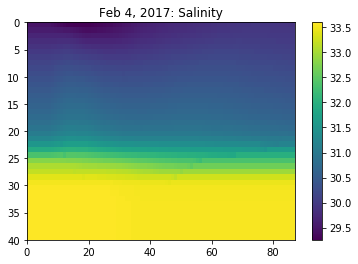

In [51]:
new_ds = nc.Dataset(filename)
fig, ax = plt.subplots(1, 1)
new_sal = new_ds['vosaline'][7]
mesh = ax.pcolormesh(new_sal[:, 2])
ax.invert_yaxis()
fig.colorbar(mesh, ax = ax)
ax.set_title('Feb 4, 2017: Salinity')
new_ds.close()

In [52]:
LO_file = '/results/forcing/LiveOcean/boundary_conditions/LO_y2017m02d05.nc'
LO_ds = nc.Dataset(LO_file)

In [53]:
LO_salinity = LO_ds.variables['vosaline'][:]
LO_temperature = LO_ds.variables['votemper'][:]

In [54]:
# Make Feb 5th file
filename = 'smooth_LO_y2017m02d05.nc'
new_file = nc.Dataset(filename, 'w')
new_file.createDimension('xbT', climate_ds.dimensions['xbT'].size)
new_file.createDimension('yb', climate_ds.dimensions['yb'].size)
new_file.createDimension('deptht', climate_ds.dimensions['deptht'].size)
new_file.createDimension('time_counter', None)

time_counter = new_file.createVariable('time_counter', 'float32', ('time_counter'))
time_counter.long_name = 'Time axis'

vosaline = new_file.createVariable('vosaline', 'float32', 
                               ('time_counter', 'deptht', 'yb','xbT'), zlib=True)
vosaline.units = 'g/kg'
vosaline.long_name = 'Reference Salinity'
votemper = new_file.createVariable('votemper', 'float32', 
                               ('time_counter', 'deptht', 'yb','xbT'), zlib=True)
votemper.units = 'oC'
votemper.long_name = 'Conservative Temperature'

new_file.title = 'Blended TEOS Climatology to LiveOcean over Feb 5, 2017'
new_file.institution = 'Dept of Earth, Ocean & Atmospheric Sciences, University of British Columbia'
new_file.source = 'https://bitbucket.org/salishsea/analysis-susan/src/tip/Hindcast_201704/Smooth2LOBC.ipynb'
new_file.reference = '/results/forcing/LiveOcean/modified/smooth_LO_y2017m02d05.nc'
new_file.history = '['+str(datetime.datetime.now())+'] Created'

for it in range(24):
    weight = (it+0.5)/24.
    vosaline[it] = weight * LO_salinity[it] + (1 - weight) * salinity
    votemper[it] = weight * LO_temperature[it] + (1 - weight) * temperature
new_file.close()

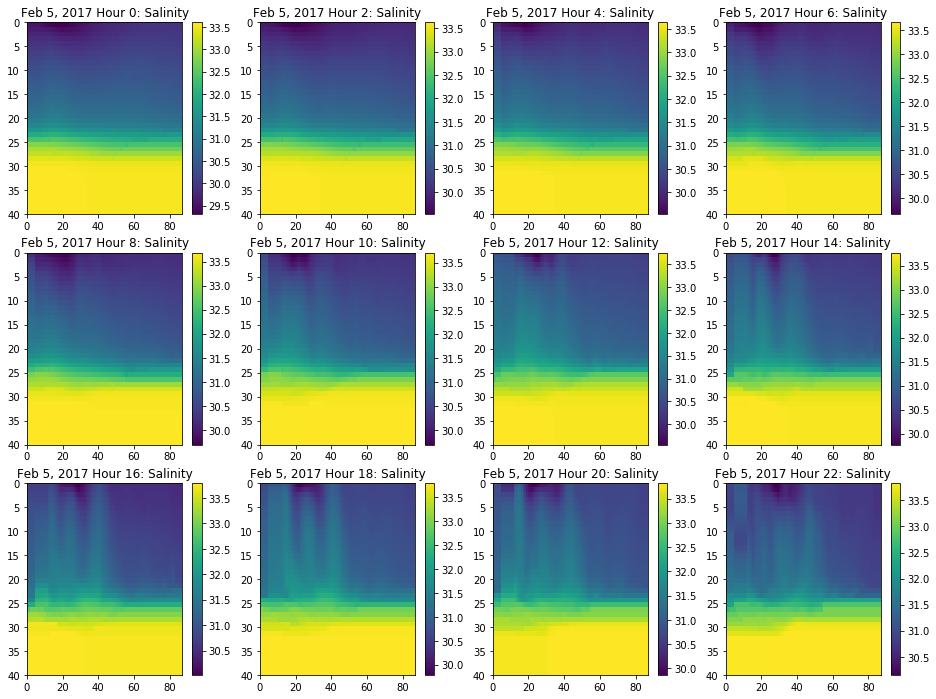

In [65]:
new_ds = nc.Dataset(filename)
fig, axs = plt.subplots(3, 4, figsize=(16, 12))
new_sal = new_ds['vosaline'][:]
for ix, ax in enumerate([axs[0, 0], axs[0, 1], axs[0, 2], axs[0, 3],
                       axs[1, 0], axs[1, 1], axs[1, 2], axs[1, 3],
                        axs[2, 0], axs[2, 1], axs[2, 2], axs[2, 3]]):
    mesh = ax.pcolormesh(new_sal[ix*2, :, 2])
    ax.invert_yaxis()
    fig.colorbar(mesh, ax = ax)
    ax.set_title('Feb 5, 2017 Hour '+str(ix*2)+': Salinity')
new_ds.close()